In [1]:
# Import necessary libraries for data processing, modeling, and visualization
# --- CatBoost for throughput (Regression) ---

# Import Libraries
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
# Load dataset and remove unnecessary column
df = pd.read_csv("dataset.csv")
df = df.drop(columns=['Unnamed: 0'])

# Define features (X) and target (y)
X = df.drop('throughput', axis=1)
y = df['throughput']

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = CatBoostRegressor(verbose=0, random_state=42)

In [4]:
# Train the model
# Train the model using the training data

model.fit(X_train, y_train)

# Predict on the test set
preds = model.predict(X_test)

In [5]:
# Evaluate
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²) score: {r2:.4f}")

Root Mean Squared Error (RMSE): 0.0224
R-squared (R²) score: 0.9999


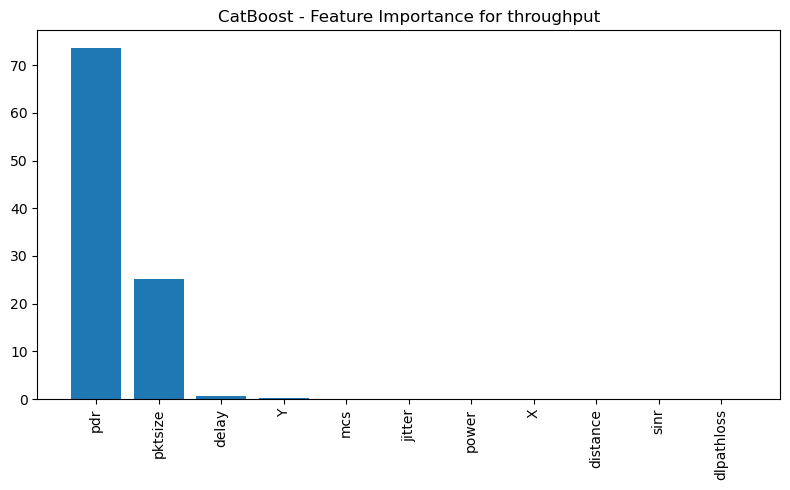

In [6]:
# Plot Feature Importance
importances = model.get_feature_importance()
indices = importances.argsort()[::-1]

# Plot the feature importance for better visualization
plt.figure(figsize=(8, 5))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("CatBoost - Feature Importance for throughput")
plt.tight_layout()
plt.show()